 Compare 10 cities from around the world. Download OSMnx networks and their network properties. Cities ca 100k people from 6 continents



Here is a list of cities with a population of around 100,000 or more, from each of the six inhabited continents:

1. Asia:
- Amman, Jordan
- Batam, Indonesia
- Changchun, China
- Faisalabad, Pakistan
- Kanpur, India
- Krasnodar, Russia
- Kumasi, Ghana
- Kyoto, Japan
- Malatya, Turkey
- Surat, India
- Taoyuan, Taiwan

2. Africa:
- Agadir, Morocco
- Aswan, Egypt
- Bamako, Mali
- Benghazi, Libya
- Blantyre, Malawi
- Bouaké, Ivory Coast
- Brazzaville, Congo
- Dodoma, Tanzania
- Ibadan, Nigeria
- Kisumu, Kenya
- Marrakech, Morocco

3. Europe:
- Ancona, Italy
- Białystok, Poland
- Burgas, Bulgaria
- Guimarães, Portugal
- Huelva, Spain
- Kielce, Poland
- Larissa, Greece
- Limerick, Ireland
- Nis, Serbia
- Trnava, Slovakia
- Wurzburg, Germany

4. North America:
- Belleville, Canada
- Binghamton, United States
- Evansville, United States
- Guelph, Canada
- La Crosse, United States
- McAllen, United States
- Merida, Mexico
- Ponce, Puerto Rico
- San Felipe, Mexico
- San Pedro Sula, Honduras
- Topeka, United States

5. South America:
- Anápolis, Brazil
- Arequipa, Peru
- Barquisimeto, Venezuela
- Calama, Chile
- Ciudad del Este, Paraguay
- Coronel, Chile
- Formosa, Argentina
- Iquique, Chile
- Parnaíba, Brazil
- Uruapan, Mexico
- Valparaíso, Chile

6. Oceania:
- Albury, Australia
- Apia, Samoa
- Bundaberg, Australia
- Geraldton, Australia
- Hastings, New Zealand
- Hervey Bay, Australia
- Lismore, Australia
- Mackay, Australia
- Port Moresby, Papua New Guinea
- Wanganui, New Zealand
- Whakatane, New Zealand

In [5]:
import osmnx as ox
import networkx as nx
ox.__version__

'1.3.0'

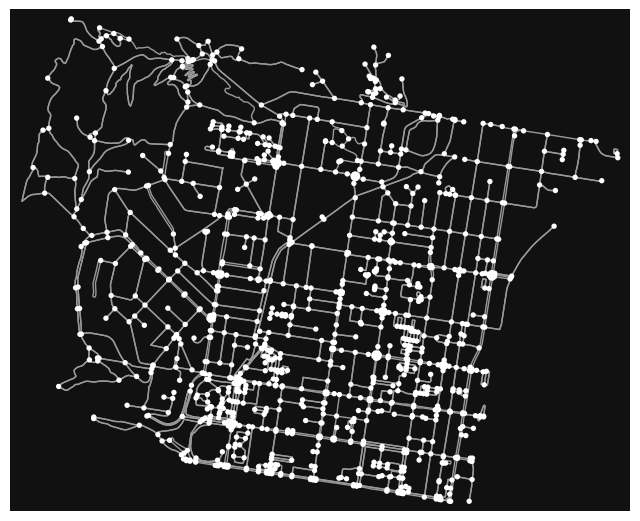

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
G = ox.graph_from_place('Albury, Australia')
ox.plot_graph(G)

In [3]:
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

5727161.340795993

In [4]:
ox.basic_stats(
    G_proj,
    area=graph_area_m
)

{'n': 1134,
 'm': 2737,
 'k_avg': 4.827160493827161,
 'edge_length_total': 183206.85100000023,
 'edge_length_avg': 66.93710303251744,
 'streets_per_node_avg': 2.929453262786596,
 'streets_per_node_counts': {0: 0, 1: 151, 2: 2, 3: 760, 4: 218, 5: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13315696649029982,
  2: 0.001763668430335097,
  3: 0.6701940035273368,
  4: 0.19223985890652556,
  5: 0.0026455026455026454},
 'intersection_count': 983,
 'street_length_total': 104158.76399999988,
 'street_segment_count': 1631,
 'street_length_avg': 63.86190312691593,
 'circuity_avg': 1.0741208519589698,
 'self_loop_proportion': 0.0030656039239730227,
 'node_density_km': 198.00385086451752,
 'intersection_density_km': 171.63825873000064,
 'edge_density_km': 31989.119931888825,
 'street_density_km': 18186.80456198276}

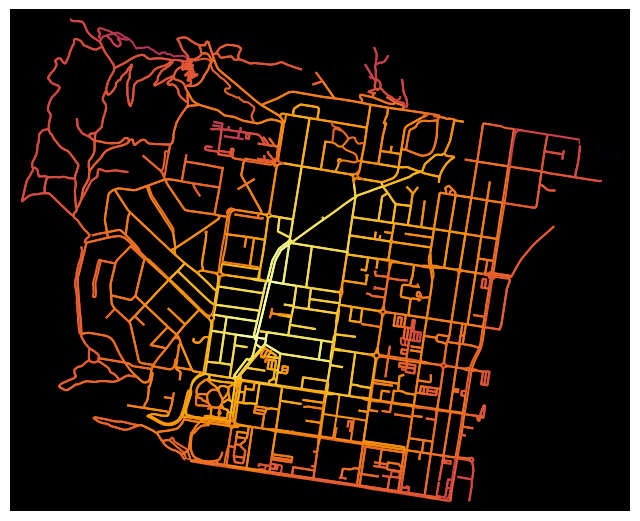

In [7]:
from matplotlib import cm, colors, colormaps

edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# list of edge values for the original graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=colormaps["inferno"])
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralises in the line graph
ox.plot_graph(
    G,
    bgcolor='k',
    node_size=0,
    edge_color=ec,
    edge_linewidth=1.5,
    edge_alpha=1
)